<a href="https://colab.research.google.com/github/MatthewRomanishin/courses/blob/main/PYDNN/fashionmnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import utils
import numpy as np
import pandas as pd
import os

from numpy.random import seed
seed(2020)
from tensorflow.random import set_seed
set_seed(2020)

import matplotlib.pyplot as plt
%matplotlib inline

for dirname, _, filenames in os.walk('/content/gdrive/My Drive/kaggle'):
    for filename in filenames:

        print(os.path.join(dirname, filename))

/content/gdrive/My Drive/kaggle/sample_submission.csv
/content/gdrive/My Drive/kaggle/test.csv
/content/gdrive/My Drive/kaggle/train.csv


In [ ]:
train_df = pd.read_csv(filepath_or_buffer='/content/gdrive/My Drive/kaggle/train.csv', index_col='id')
test_df = pd.read_csv(filepath_or_buffer='/content/gdrive/My Drive/kaggle/test.csv', index_col='id')
sample_submission = pd.read_csv(filepath_or_buffer='/content/gdrive/My Drive/kaggle/sample_submission.csv', index_col='id')

In [ ]:
x_train, y_train = train_df.iloc[:,:-1].values, train_df['label'].values
x_test = test_df.values

In [ ]:
classes = {0:'футболка', 1:'брюки', 2:'свитер', 3:'платье', 4:'пальто',
           5:'туфли', 6:'рубашка', 7:'кроссовки', 8:'сумка', 9:'ботинки'}

In [ ]:
# plt.figure(figsize=(10,10))
# for i in range(100,150):
#     plt.subplot(5,10,i-100+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(x_train[i].reshape((28,28)), cmap=plt.cm.binary)
#     plt.xlabel(classes[y_train[i]])

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
print(y_train[100])

7


In [ ]:
y_train = utils.to_categorical(y_train)

In [ ]:
print(y_train[100])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(units=800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(units=10, activation="softmax"))

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_7 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
history = model.fit(x_train, y_train,
        batch_size=200,
        epochs=50,
        validation_split=0.2,
        verbose=1)

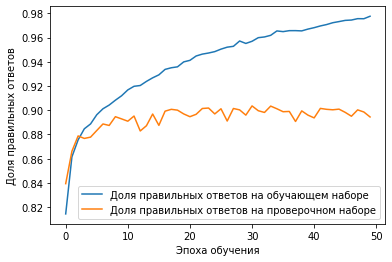

In [ ]:
plt.plot(history.history['accuracy'], 
label='Доля правильных ответов на обучающем наборе') 
plt.plot(history.history['val_accuracy'], 
label='Доля правильных ответов на проверочном наборе') 
plt.xlabel('Эпоха обучения') 
plt.ylabel('Доля правильных ответов') 
plt.legend() 
plt.show() 

In [ ]:
predictions = model.predict(x_train)

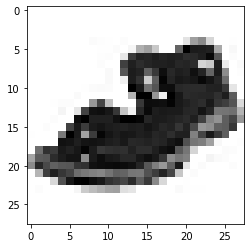

In [ ]:
n = 2020
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

In [ ]:
print(predictions[n])

[4.7817301e-15 4.4675735e-19 3.9071380e-18 3.3563981e-20 2.9168822e-18
 9.9944526e-01 3.0101958e-19 5.5478391e-04 1.9364883e-10 5.9145208e-08]


In [ ]:
np.argmax(predictions[n])

5

In [ ]:
classes[np.argmax(predictions[n])]


'туфли'

In [ ]:
np.argmax(y_train[n])


5

In [ ]:
classes[np.argmax(y_train[n])]


'туфли'

In [ ]:
predictions = model.predict(x_test)
"""извлекаем номера предсказаний с максимальными вероятностями по всем объектам тестового набора"""
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 2, 7, ..., 6, 0, 5])

In [ ]:
sample_submission['label'] = predictions

In [ ]:
sample_submission.to_csv('sample_submission.csv')